# DATA 601 Introduction to Data Science (03.7420) SP2020
## week 7: visualizing time series data
## Assignment Content

### Acquire power data from this source for at least 10 days and not more than 40 days. The website limits the window size, so you will need to download multiple files. Load the data into a Jupyter Notebook. Combine the multiple input files to create a single dataframe.
Create two bar graphs of the power consumption per hour.

One bar graph has 24 bars; each bar is the average across all days for that hour​
one bar graph has 24*(number of days) bars. Your choice of average or sum for each hour

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading CSV files from the source mentioned in the content to the dataframes df1 and df2
df1 = pd.read_csv("RollingSystemDemand_20200324_0356.csv")
df2 = pd.read_csv("RollingSystemDemand_20200324_0357.csv")

# Concatenating two dataframes to df
df = pd.concat([df1,df2])

In [2]:
# This shape returns number of rows and columns in the dataframe
df.shape

(3730, 2)

In [3]:
# checking for null values in the data frame
df.isnull().sum(axis = 0)

HDR                      0
ROLLING SYSTEM DEMAND    2
dtype: int64

In [4]:
# From the result above we can see two null values of "FTR"
# dropna() drops rows if there are any null values
datafram = df.dropna()

# Indexes needs to be reset (Noticed error in retreving values using indexes without resetting )
datafram = datafram.reset_index(drop=True)

In [5]:
# Two rows of "FTR" with NULL values were removed from the dataframe
datafram.shape

(3728, 2)

### Inserted "Hour" column in the dataframe with Null values

In [6]:
# This will insert new column 'Hour' with values 'NaN'
datafram.insert(2, 'Hour', 'NaN')
datafram

,HDR,ROLLING SYSTEM DEMAND,Hour
0,20200310000000,25004.0,NaN
1,20200310000500,25340.0,NaN
2,20200310001000,25407.0,NaN
3,20200310001500,25422.0,NaN
4,20200310002000,25401.0,NaN
5,20200310002500,25391.0,NaN
6,20200310003000,25366.0,NaN
7,20200310003500,25634.0,NaN
8,20200310004000,25622.0,NaN
9,20200310004500,25661.0,NaN


### Each value in the "Hour" will be inserted with hour values from 'timestamp' of dataframe

In [7]:
for i in range(len(datafram)):
    # This is done to supress a system warning of copying mutiple values
    pd.options.mode.chained_assignment = None
    
    # a_str is assigned with str value of timestamp
    a_str = str(datafram['HDR'][i])
    
    # Indexing the timestamp above to get hours and typecasted to integer and assigned to hour_str
    hour_str = int(a_str[8]+a_str[9])
    
    # Assigning each row of the "Hour" column with respective hour_str above.
    datafram['Hour'][i] = hour_str

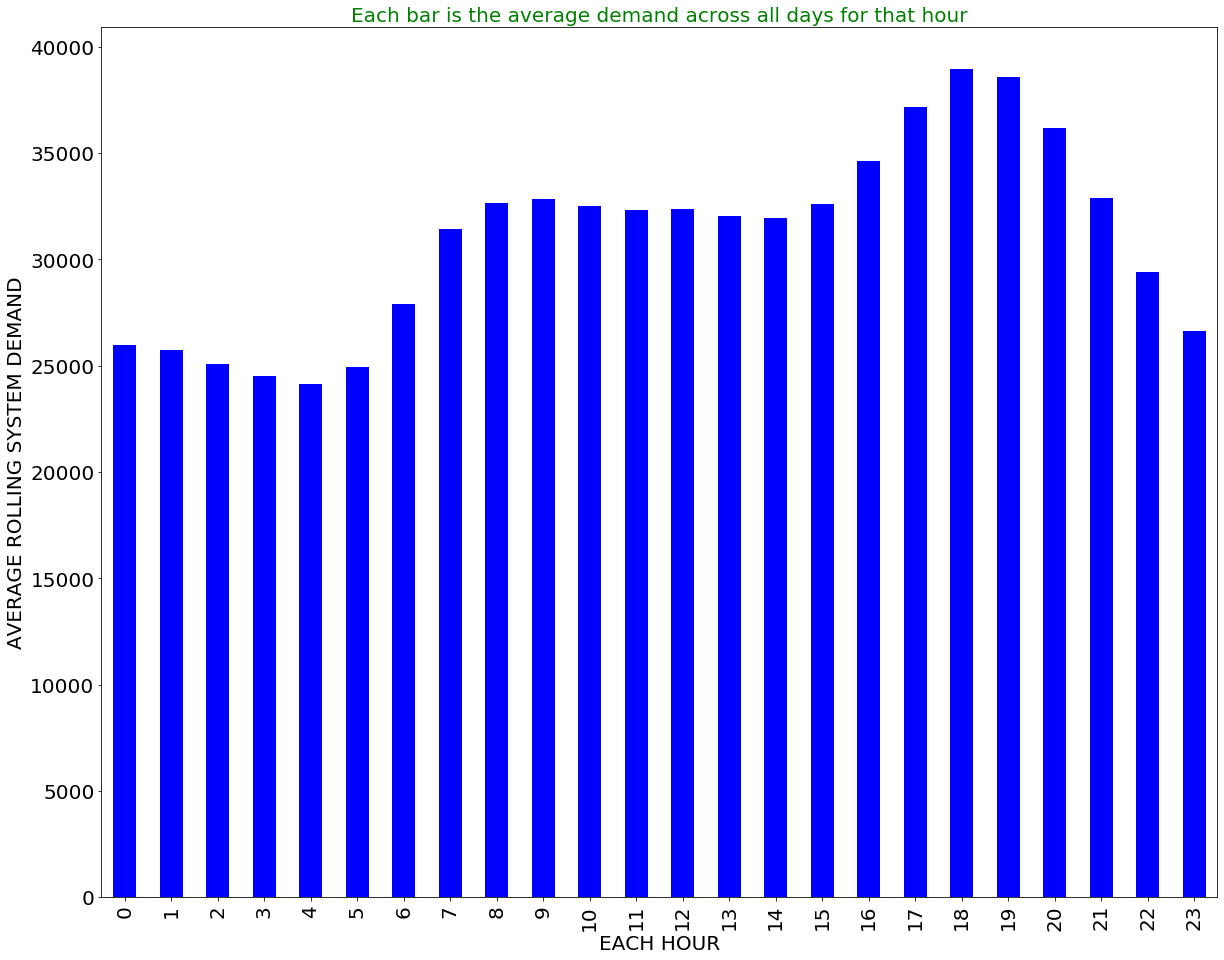

In [9]:
# Grouping by "Hour" column with "rolling system demand" column for average 
hours_group=datafram.groupby(['Hour'])['ROLLING SYSTEM DEMAND'].mean()

hours_group.plot(kind='bar',figsize=(20,16),color='blue',fontsize=20)
plt.title('Each bar is the average demand across all days for that hour', color='green', fontsize=20)
plt.xlabel('EACH HOUR',fontsize=20)
plt.ylabel('AVERAGE ROLLING SYSTEM DEMAND',fontsize=20)
plt.show()

### Inserted "DAY_HOUR" column in the dataframe with Null values

In [10]:
datafram.insert(3, 'DAY_HOUR', 'NaN')
datafram

,HDR,ROLLING SYSTEM DEMAND,Hour,DAY_HOUR
0,20200310000000,25004.0,0,NaN
1,20200310000500,25340.0,0,NaN
2,20200310001000,25407.0,0,NaN
3,20200310001500,25422.0,0,NaN
4,20200310002000,25401.0,0,NaN
5,20200310002500,25391.0,0,NaN
6,20200310003000,25366.0,0,NaN
7,20200310003500,25634.0,0,NaN
8,20200310004000,25622.0,0,NaN
9,20200310004500,25661.0,0,NaN


### Each value in the "DAY+HOUR" will be inserted with "xxD+xxH" from the time stamp values

In [11]:
for i in range(len(datafram)):
    # This is done to supress a system warning of copying mutiple values
    pd.options.mode.chained_assignment = None
    
    # b_str is assigned with str value of timestamp
    b_str = str(datafram['HDR'][i])
    
    # day_str is assigned with day value from the string above and appended with "D"
    day_str = b_str[6]+b_str[7]+"D"
    
    # day_hour_str is assigned with hours from the timestamp string b_str above
    day_hour_str = b_str[8]+b_str[9]+'H'
    
    # Assigning each row of the "DAY_HOUR" column with respective day_hour_str above.
    datafram['DAY_HOUR'][i] = day_str+"+"+day_hour_str

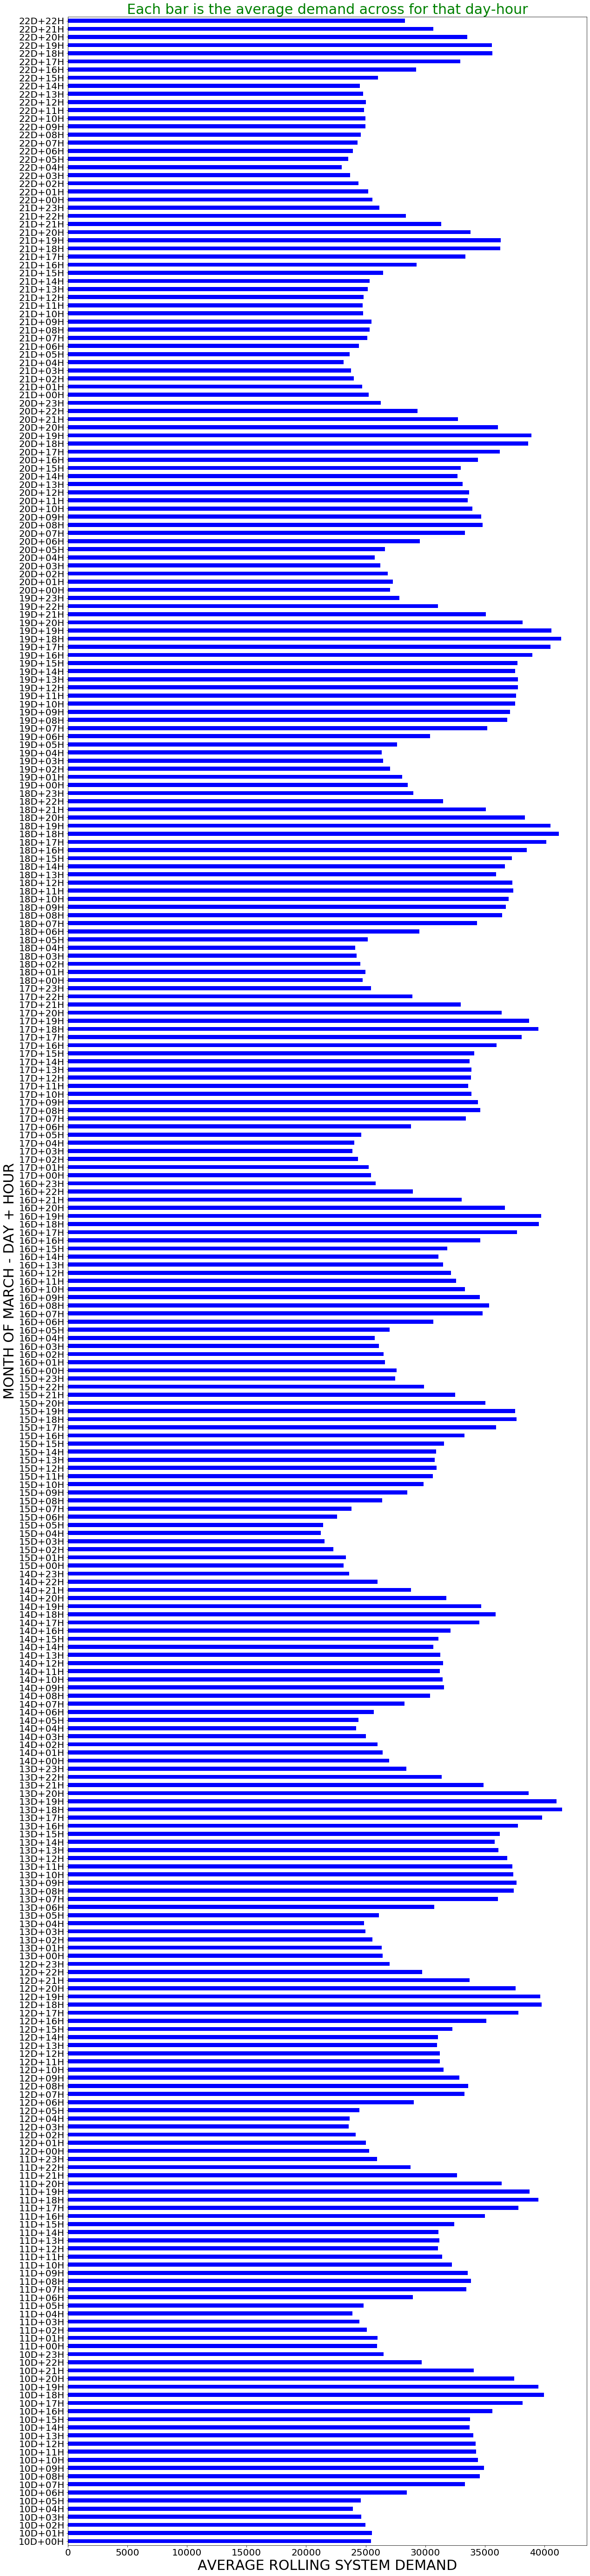

In [13]:
# Grouping by "DAY-HOUR" column with "rolling system demand" column for average of system demand 
hours_group=datafram.groupby(['DAY_HOUR'])['ROLLING SYSTEM DEMAND'].mean()

hours_group.plot(kind='barh',figsize=(20,100),color='blue',fontsize=20)
plt.title('Each bar is the average demand across for that day-hour', color='green', fontsize=30)
plt.xlabel('AVERAGE ROLLING SYSTEM DEMAND',fontsize=30)
plt.ylabel('MONTH OF MARCH - DAY + HOUR',fontsize=30)
plt.show()